# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [8]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt


# Import API key
from api_keys import geoapify_key

In [5]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("C:/Users/aliaq/OneDrive/Documents/Homework/homework 6/Starter_Code/output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

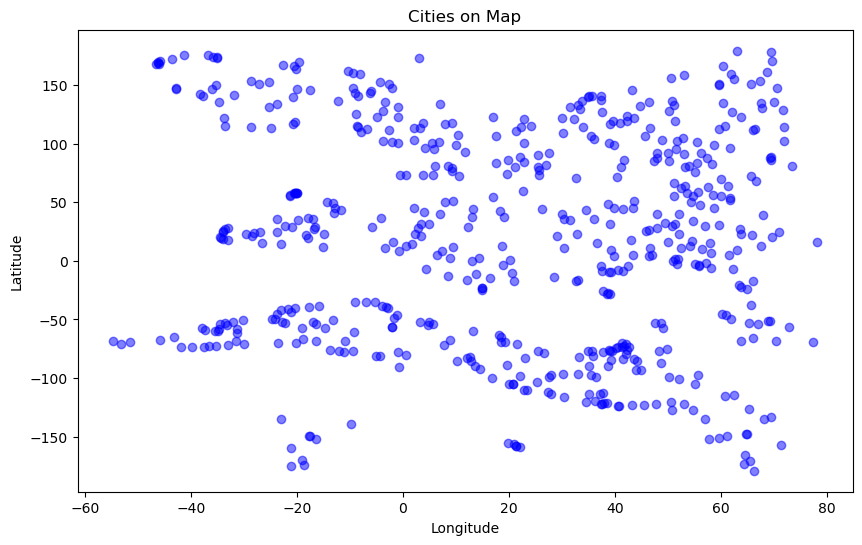

In [9]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE
# Configure the map plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Assuming you have latitude and longitude data in your dataset
# Replace latitudes and longitudes with your actual data


# Plot the points on the map
plt.scatter(city_data_df.Lat, city_data_df.Lng, marker='o', color='blue', alpha=0.5)

# Add title and labels
plt.title('Cities on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the map
plt.show()


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [20]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

# Drop any rows with null values
# YOUR CODE HERE

import pandas as pd

# Read the CSV file into a DataFrame
city_data = pd.read_csv('C:/Users/aliaq/OneDrive/Documents/Homework/homework 6/Starter_Code/output_data/cities.csv')
print (city_data)
# Narrow down cities that fit criteria (for example, temperature greater than 20°C)
criteria_cities = city_data[city_data['Max Temp'] > 20]  # Adjust criteria as needed

# Drop any rows with null values
cleaned_data = criteria_cities.dropna()

# Display sample data
print(cleaned_data.head())  # Display the first few rows of the cleaned data



     City_ID         City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          0         faya  18.3851   42.4509     22.06        35          21   
1          1      farsund  58.0948    6.8047     13.30       100           0   
2          2  new norfolk -42.7826  147.0587     11.72        58          12   
3          3    jamestown  42.0970  -79.2353      5.77        77         100   
4          4      lanzhou  36.0564  103.7922     14.53        48          59   
..       ...          ...      ...       ...       ...       ...         ...   
572      572    sovetskiy  61.3614   63.5842      3.93        96         100   
573      573      tatarsk  55.2190   75.9828      3.78        89          84   
574      574    canchungo  12.0672  -16.0333     35.07        61          67   
575      575      iquique -20.2208  -70.1431     17.02        68           6   
576      576         poum -20.2333  164.0167     23.91        79          23   

     Wind Speed Country        Date  
0

### Step 3: Create a new DataFrame called `hotel_df`.

In [23]:


# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = cleaned_data[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

# Display sample data
print(hotel_df.head())  # Display the first few rows of the hotel DataFrame


            City Country      Lat       Lng  Humidity Hotel Name
0           faya      SA  18.3851   42.4509        35           
7      carnarvon      AU -24.8667  113.6333        76           
9   saint-pierre      RE -21.3393   55.4781        68           
10      colorado      BR -22.8375  -51.9731        86           
12        trairi      BR  -3.2778  -39.2689        51           


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [32]:
# Set parameters to search for a hotel
radius = 5000  # You need to define the radius for your hotel search, e.g., 5000 meters
params = {
    "radius": radius,
    "filter": "category:hotels",
    "bias": "proximity",  # Bias towards locations close to the provided latitude and longitude
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    Lat = row['Lat']
    Lng = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["bias"] = f"proximity:{Lng},{Lat}"  # Note the order of latitude and longitude
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_name = response["features"][0]["properties"]["name"]
        hotel_df.loc[index, "Hotel Name"] = hotel_name
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
print(hotel_df)

Starting hotel search
faya - nearest hotel: No hotel found
carnarvon - nearest hotel: No hotel found
saint-pierre - nearest hotel: No hotel found
colorado - nearest hotel: No hotel found
trairi - nearest hotel: No hotel found
puerto ayora - nearest hotel: No hotel found
avarua - nearest hotel: No hotel found
guiratinga - nearest hotel: No hotel found
rikitea - nearest hotel: No hotel found
bambous virieux - nearest hotel: No hotel found
saint-louis - nearest hotel: No hotel found
cape town - nearest hotel: No hotel found
naberera - nearest hotel: No hotel found
labuhan - nearest hotel: No hotel found
tomatlan - nearest hotel: No hotel found
sao joao da barra - nearest hotel: No hotel found
kapaa - nearest hotel: No hotel found
mogadishu - nearest hotel: No hotel found
hilo - nearest hotel: No hotel found
businga - nearest hotel: No hotel found
lasa - nearest hotel: No hotel found
vaini - nearest hotel: No hotel found
cayenne - nearest hotel: No hotel found
east london - nearest hotel: 

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

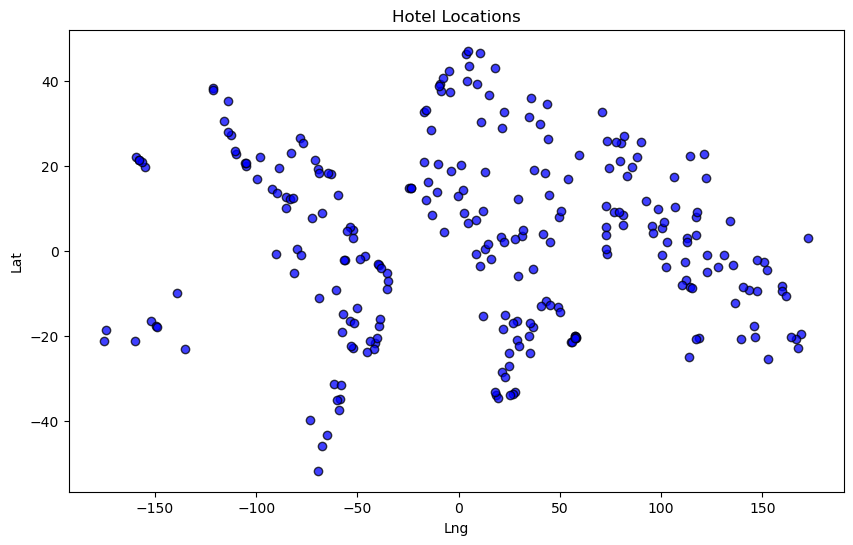

In [36]:




# Configure the map plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the cities on the map
plt.scatter(hotel_df['Lng'], hotel_df['Lat'], 
            c='blue', edgecolor='black', alpha=0.75, marker='o')

# Add labels and title
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Hotel Locations')

# Display the map
plt.show()
